<a href="https://colab.research.google.com/github/redcoding72/Data-Science/blob/main/g%C3%A9rer_les_valeurs_manquantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comment gérer les valeurs manquantes d'une base de données?


# Comment gérer les valeurs manquantes d'une base de données?


In [3]:
# Importer les packages
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Lire la base de données
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Voir les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

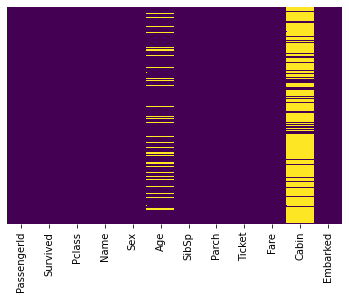

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

In [11]:
 # Taille de la BDD
 df.shape

(891, 12)

In [12]:
# Suppression des valeurs manquantes 
df.dropna(how='any',).shape

(183, 12)

In [13]:
df.shape

(891, 12)

In [14]:
# Suppression des valeurs manquantes d'une colonne
df.dropna(subset=['Age'], how='any').shape

(714, 12)

In [15]:
df['Age'].median()

28.0

In [16]:
# Remplacer les valeurs manquante de Age avec la medianne
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Compter les nombre d'occurance des cabines
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
# remplacer les valeurs manquante des cabines
df['Cabin'].fillna(value='No cabin number', inplace=True)

In [20]:
df['Cabin'].value_counts()

No cabin number    687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
                  ... 
E34                  1
C7                   1
C54                  1
E36                  1
C148                 1
Name: Cabin, Length: 148, dtype: int64

In [21]:
# Creation d'ine deuxième Dataframe df2
# Lire la base de données
df2 = pd.read_csv('/content/drive/MyDrive/train.csv')

In [22]:
# remplacer les valeurs manquante des cabines
df2['Cabin'].fillna(method='bfill', inplace=True)

In [23]:
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [24]:
df2['Cabin'].fillna(method='ffill', inplace=True)

In [25]:
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [26]:
df2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
# remplacer les valeurs manquante de l'age
df2['Age'].fillna(method='ffill', inplace=True)

In [28]:
df2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64